# 01 kNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1 首先自己实现一个 kNN 算法

In [2]:
print(np)

<module 'numpy' from '/opt/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>


In [3]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [44]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
X_train.shape[0]

10

In [45]:
X_train.shape[1]

2

In [43]:
y_train.shape[0]

10

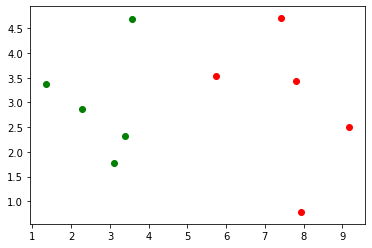

In [5]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

In [6]:
# a new x
x = np.array([8.093607318, 3.365731514])

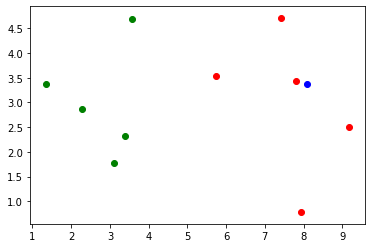

In [7]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

In [8]:
from math import sqrt

# distances = []
# for x_train in X_train:
#     d = sqrt(np.sum((x_train - x) ** 2))
#     distances.append(d)

# oneline
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [9]:
# 排列之后返回 index
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [10]:
nearest = np.argsort(distances)

In [11]:
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [12]:
# 假设取前六个
k = 6

In [13]:
# 通过 index 获取 y_train 中的结果
topK_y = [y_train[i] for i in nearest[:k]]

In [14]:
topK_y

[1, 1, 1, 1, 1, 0]

In [46]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [49]:
votes.most_common(1)

[(1, 5)]

In [16]:
votes = Counter(topK_y)
votes.most_common(1)[0][0]

1

In [17]:
# load file in folder
%run kNN.py

In [18]:
predict_y = kNN_classify(6, X_train, y_train, x)
predict_y

1

# 4.2 scikit-learn 中 kNN 的实现

### scikit-learn 采用统一的调用方式去使用它的学习算法

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [21]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [27]:
# 转化为矩阵，1 是一维矩阵，-1 是让框架自动决定第二个维度的数量
X_predict = x.reshape(1, -1)

In [28]:
X_predict

array([[8.09360732, 3.36573151]])

In [30]:
y_predict = kNN_classifier.predict(X_predict)

In [31]:
y_predict

array([1])

In [33]:
y_predict[0]

1

# 重新按照 sciki-learn 的方式封装自己的 kNN 方法

In [59]:
%run kNN/kNN.py

In [60]:
knn_clf = KNNClassifier(k=6)

In [61]:
knn_clf.fit(X_train, y_train)

kNN(k=6)

In [63]:
y_predict = knn_clf.predict(X_predict)

In [66]:
y_predict

array([1])

In [67]:
y_predict[0]

1